In [1]:
!pip install fer


  Obtaining dependency information for fer from https://files.pythonhosted.org/packages/19/d7/cc5954aac8db0be7eaff31c5cd059c23af59391d228c9d09cead0250bdae/fer-22.5.1-py3-none-any.whl.metadata
  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/aa/2e/576ac47f21d555b459ca837bb3fb937e50339b8fbfd294945ea2f5290416/opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
  Using cached facenet_pytorch-2.5.3-py3-none-any.whl (1.9 MB)
  Using cached moviepy-1.0.3.tar.gz (388 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached ffmpeg-1.4-py3-none-any.whl
  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
  Using cached proglog-0.1.10-py3-none-any.whl (6.1 kB)
  Obtaining dependency information for imageio<3.0,>=2.5 from https://files.pythonhosted.org/packages/c0/69/3aaa69cb0748e33e644fda114c9abd3186ce369edd4fca11107e9f39c6a7/imageio-2.33.1-py3-none-any.whl.


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import tensorflow as tf
gpu_devices = tf.config.list_physical_devices('GPU')
print(f'{gpu_devices}')

emotion_detector = FER(mtcnn=True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [38]:
from fer import FER, Video
from pathlib import Path
file_path = r"D:\Face-Detection-JavaScript-master\web\server\recordings\videos\1\56c0976e18eb46f6b48d82a5301b0c33_1705869016.mp4"
video = Video(file_path)
vid = video.analyze(detector = emotion_detector, frequency = 15)

INFO:fer:30.30 fps, -279496122328932608 frames, -9223372036854776.00 seconds
INFO:fer:Making directories at output
INFO:fer:Deleted pre-existing output\56c0976e18eb46f6b48d82a5301b0c33_1705869016_output.mp4
61frames [00:08,  6.81frames/s]
INFO:fer:Completed analysis: saved to output\56c0976e18eb46f6b48d82a5301b0c33_1705869016_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 81%
INFO:fer:Zip has finished


In [55]:
# len(vid)
import time
t1=time.time()
df1 = video.to_pandas(vid)
print(time.time()-t1)

0.004250049591064453


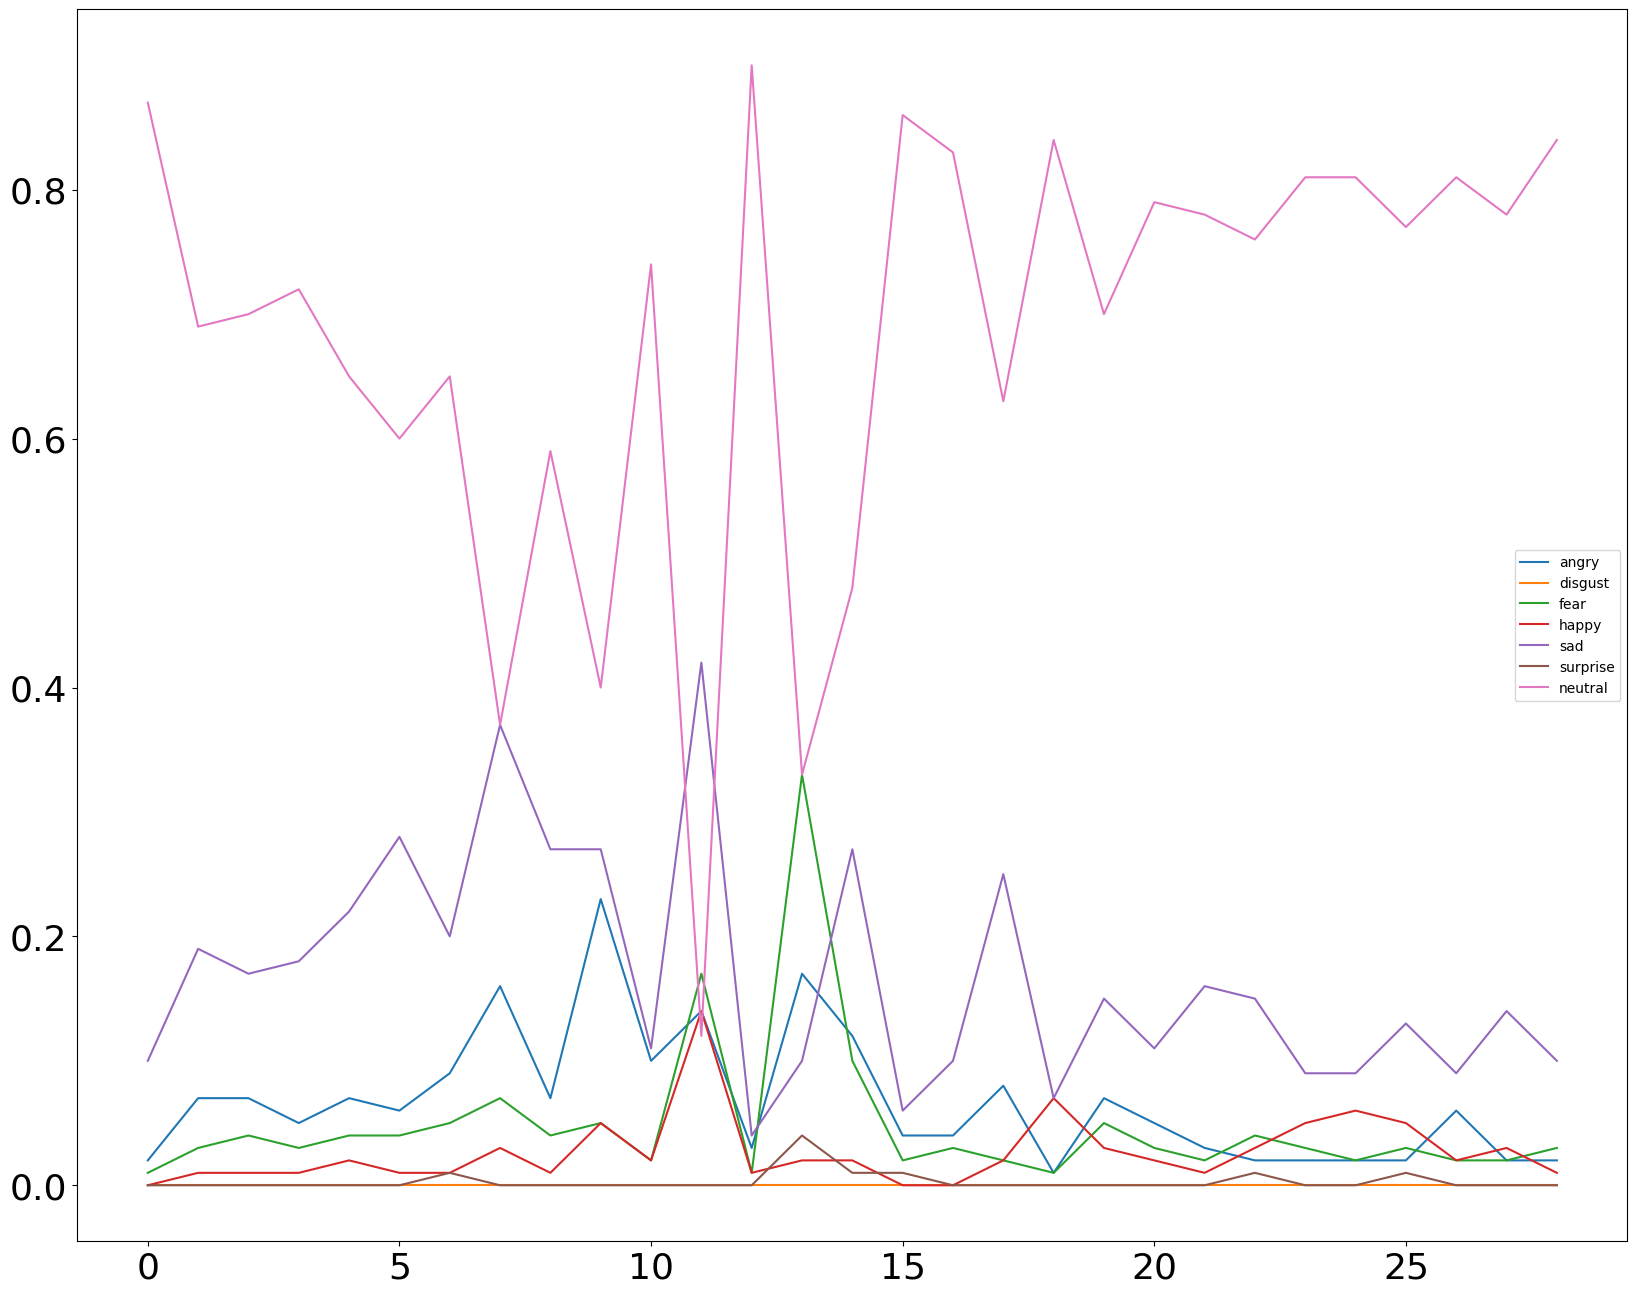

In [41]:
# Convert to pandas for analysis
df1 = video.to_pandas(vid)
df2 = video.get_first_face(df1)
df3 = video.get_emotions(df2)

# Plot emotions
fig = df3.plot(figsize=(20, 16), fontsize=26).get_figure()

In [68]:
emotion_score = {}
for col in df3.columns:
    emotion_score[col] = round(df3.mean()[col],3)
emotion_score

{'angry': 0.067,
 'disgust': 0.0,
 'fear': 0.048,
 'happy': 0.027,
 'sad': 0.168,
 'surprise': 0.003,
 'neutral': 0.683}

In [ ]:
face = vid[0]["faces"][0]

# Get emotion score and classification
emotion_score = face["emotions"]
emotion_classification = max(emotion_score, key=emotion_score.get)
emo_score = {'Emotion': {emotion_classification}, 'Score': {emotion_score[emotion_classification]}}
print(f"{emo_score}")